In [1]:
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.
# https://www.tensorflow.org/tutorials/keras/regression?hl=es-419
'''
HAREMOS UNA REGRESIÓN SOBRE LA CARACTERÍSTICA 'MPG' (MILLAS X GALÓN) PARA
DISTINTOS VEHÍCULOS Y VEREMOS CÓMO SE COMPORTA EL MODELO DE RED NEURONAL
'''


import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [2]:
dataset_url="http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"


In [ ]:
from google.colab import files     # NO CORRER, sólo de muestra
files.upload()

{}

Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)



In [3]:
# CARGO DATASET DIRECTO A DATAFRAME DE PANDAS, COPIAR Y VERLO
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_url, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [4]:
# HAY VALORES AUSENTES?
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
# MÁS INFORMACIÓN CON OTRO MÉTODO DE PANDAS
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [6]:
# ELIMINAR COLUMNAS CON VALORES AUSENTES
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
data=dataset.copy()
data.dropna(axis=1, inplace=True)

In [7]:
data


,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,3504.0,12.0,70,1
1,15.0,8,350.0,3693.0,11.5,70,1
2,18.0,8,318.0,3436.0,11.0,70,1
3,16.0,8,304.0,3433.0,12.0,70,1
4,17.0,8,302.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
393,27.0,4,140.0,2790.0,15.6,82,1
394,44.0,4,97.0,2130.0,24.6,82,2
395,32.0,4,135.0,2295.0,11.6,82,1
396,28.0,4,120.0,2625.0,18.6,82,1


In [8]:
# CORTAR COLUMNA CATEGÓRICA PARA 'EXPRESAR' SUS CATEGORÍAS
origin = data.pop('Origin')

In [9]:
# REDEFINIR COLUMNA DE 'ORIGEN' EN EL DATASET COMO CATEGORÍAS
data['USA'] = (origin == 1)*1.0
data['Europe'] = (origin == 2)*1.0
data['Japan'] = (origin == 3)*1.0
data.tail()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,2720.0,19.4,82,1.0,0.0,0.0


In [10]:
# DEFINIR CONJUNTO DE ENTRENAMIENTO 80% Y CONJUNTO DE TEST 20% USANDO PANDAS PARA TOMAR LA MUESTRA ALEATORIA
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html
train_dataset = data.sample(frac=0.8,random_state=0)
test_dataset = data.drop(train_dataset.index)

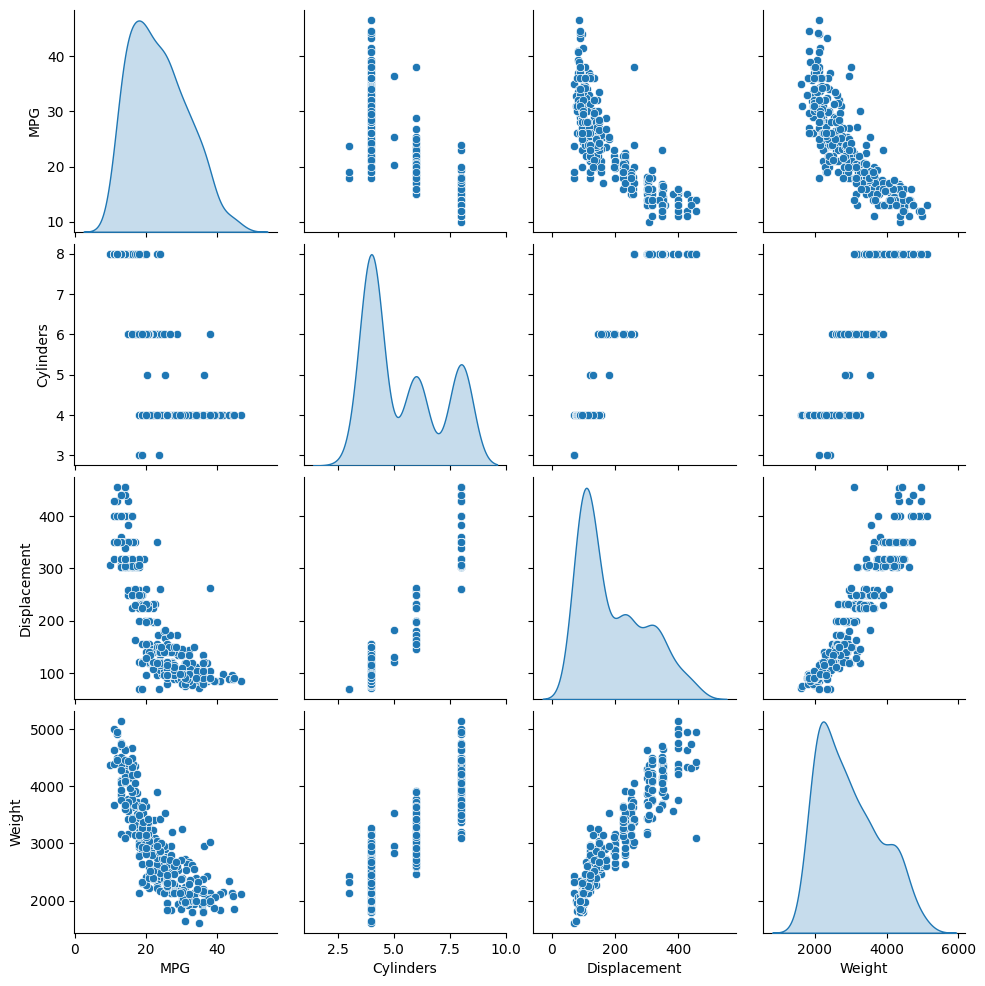

In [12]:
# VEMOS UN POCO LA DISTRIBUCIÓN CONJUNTA DE ALGUNAS DE LAS CARACTERÍSTICAS DEL DATASET
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [11]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
MPG,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
Cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
Displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
Weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
Acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
Model Year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
Origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [12]:
# VER LOS ESTADÍSTICOS (CÓMODAMENTE) DEL DATASET SIN LA COLUMNA TARGET 'MPG'
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,318.0,5.427673,1.682941,3.0,4.00,4.0,6.00,8.0
Displacement,318.0,193.061321,103.812742,70.0,100.25,151.0,259.50,455.0
Weight,318.0,2963.823899,844.749805,1613.0,2219.25,2792.5,3571.25,5140.0
Acceleration,318.0,15.595912,2.796282,8.0,13.90,15.5,17.30,24.8
Model Year,318.0,75.946541,3.705266,70.0,73.00,76.0,79.00,82.0
USA,318.0,0.641509,0.480313,0.0,0.00,1.0,1.00,1.0
Europe,318.0,0.163522,0.370424,0.0,0.00,0.0,0.00,1.0
Japan,318.0,0.194969,0.396801,0.0,0.00,0.0,0.00,1.0


In [13]:
# CORTO LA CARACTERÍSTICA 'MPG' DEL DATASET DE ENTRENAMIENTO Y TEST Y GUARDAR EN VARIABLE NUEVA
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [14]:
# DEFINO FUNCIÓN PARA ESTANDARIZAR VARIABLES -> LA VARIABLE NORMALIZADA TIENE DISTRIBUCIÓN GAUSSIANA
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [15]:
# CONSTRUIR EL MODELO: DEFINO ARQUITECTURA DE LA RED Y PARÁMETROS RELEVANTES
# https://qastack.mx/stats/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
# https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
# https://keras.io/getting_started/

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [16]:
# INSTANCIO MODELO
model = build_model()

In [17]:
# COMPROBAR QUE SEA LO DESEADO
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [18]:
# PRUEBO EL FUNCIONAMIENTO DEL MODELO CON UNA PARTE PEQUEÑA DEL DATASET DE TRAIN
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 231ms/step


array([[ 0.09806763],
       [-0.06835366],
       [-0.03765725],
       [-0.1225325 ],
       [ 0.03081404],
       [-0.0206891 ],
       [-0.00517936],
       [ 0.00827797],
       [ 0.30866382],
       [ 0.11548284]], dtype=float32)

In [19]:
# DEFINO FUNCIÓN PARA MOSTRAR EL AVANCE DEL ENTRENAMIENTO Y ENTRENARLO. DEMORA 1:30 MINUTOS APROX

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [20]:
# VEO UNA PARTE DEL HISTORIAL DEL ENTRENAMIENTO
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.377636,1.014136,2.377636,9.761551,2.032530,9.761551,995
996,2.410878,1.020463,2.410878,9.839817,2.030660,9.839817,996
997,2.475485,1.004476,2.475485,9.795571,2.047805,9.795571,997
998,2.257871,0.968368,2.257871,9.906301,2.057749,9.906301,998
999,2.554012,1.039597,2.554012,9.583447,1.997206,9.583447,999


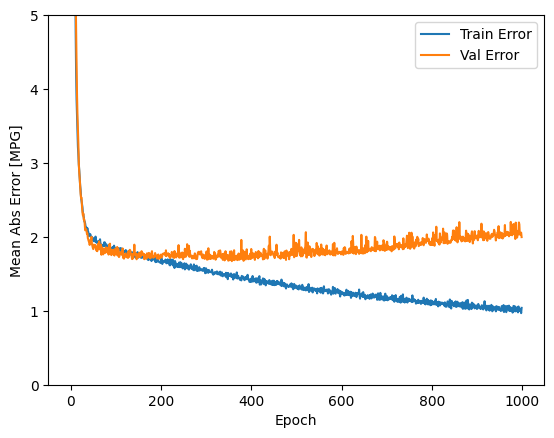

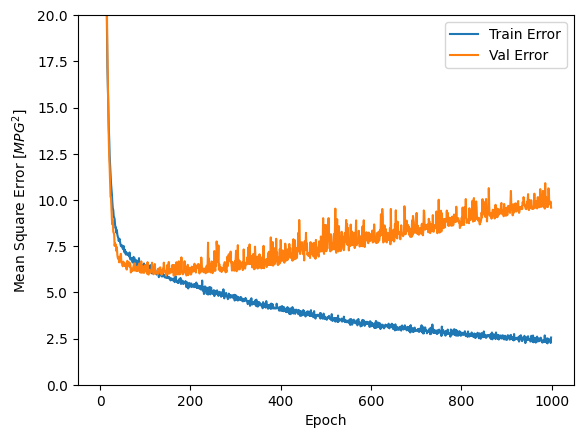

In [21]:
# GRAFICO LA EVOLUCIÓN DE LAS MÉTRICAS DEL MODELO VS ÉPOCAS (ITERACIONES)
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


https://stackoverflow.com/questions/47299624/how-to-understand-loss-acc-val-loss-val-acc-in-keras-model-fitting

Para comprender mejor lo anterior, recomiendo este artículo


....................................................................................................
.........

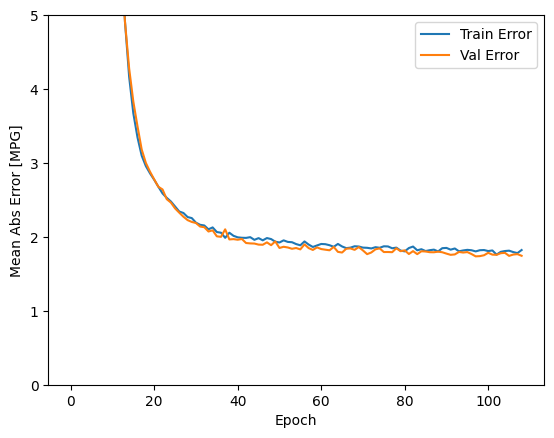

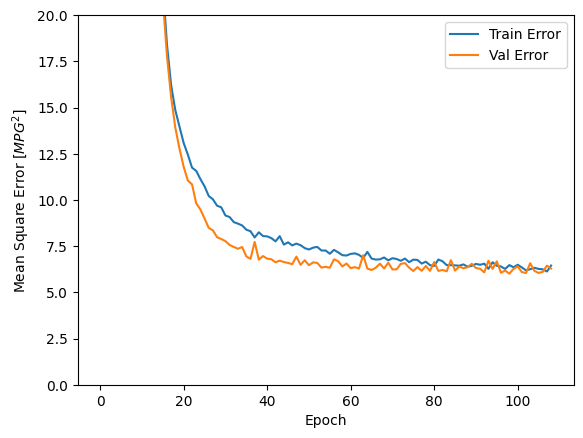

In [22]:
# EL MODELO TERMINA TENDIENDO AL SOBREAJUSTE Y ESO ES MALO
# HAY QUE DETENERLO ANTES DE QUE COMIENCE A SOBREAJUSTAR Y USAR 'EARLY STOPPING'
# REINSTANCIAR MODELO Y AGREGAR EARLY STOPPING
# DEMORA MUCHO MENOS Y LOS RESULTADOS SON MEJORES

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [23]:
# CALCULO Y MUESTRO LAS MÉTRICAS USADAS PARA EVALUAR EL MODELO

loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 7.2300 - mae: 2.0411 - mse: 7.2300 - 124ms/epoch - 41ms/step
Testing set Mean Abs Error:  2.04 MPG


3/3 [==============================] - 0s 3ms/step


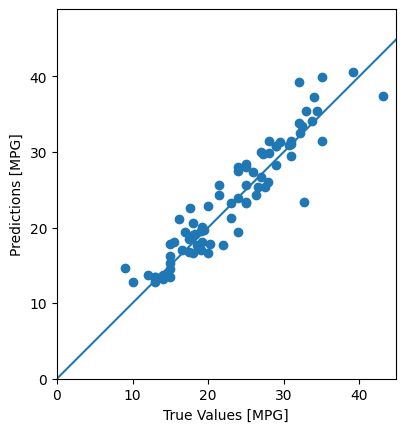

In [24]:
# PREDIGO SOBRE EL DATASET DE TESTEO Y GRAFICO PREDICCIONES VS VALORES REALES
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [25]:
test_predictions

array([16.28381  , 12.767602 , 14.687334 , 23.386066 , 25.638414 ,
       13.561427 , 13.138114 , 13.6605   , 16.961279 , 31.452217 ,
       23.909464 , 12.8266325, 14.4489565, 21.285786 , 26.629354 ,
       13.47361  , 13.7146225, 13.239867 , 18.975794 , 13.39455  ,
       13.464993 , 30.845463 , 22.87452  , 15.349166 , 19.498787 ,
       17.883512 , 33.792507 , 28.070374 , 29.405884 , 16.610643 ,
       16.681864 , 27.953976 , 20.659206 , 23.25096  , 23.188358 ,
       28.396902 , 27.315672 , 17.728876 , 19.44509  , 28.29854  ,
       30.761866 , 18.545614 , 31.375044 , 17.040918 , 25.634895 ,
       24.241251 , 37.43977  , 17.764673 , 19.726545 , 18.106361 ,
       16.8021   , 25.341639 , 27.531858 , 21.168364 , 19.376766 ,
       19.169153 , 18.03039  , 20.063692 , 17.735018 , 24.362608 ,
       32.435528 , 26.073042 , 23.355234 , 31.390036 , 33.467854 ,
       29.67806  , 40.588562 , 39.923344 , 35.386803 , 35.415264 ,
       34.045345 , 31.47785  , 30.928497 , 25.303148 , 22.6118

In [26]:
test_labels

9      15.0
25     10.0
28      9.0
31     25.0
32     25.0
       ... 
368    27.0
370    31.0
382    34.0
384    32.0
396    28.0
Name: MPG, Length: 80, dtype: float64

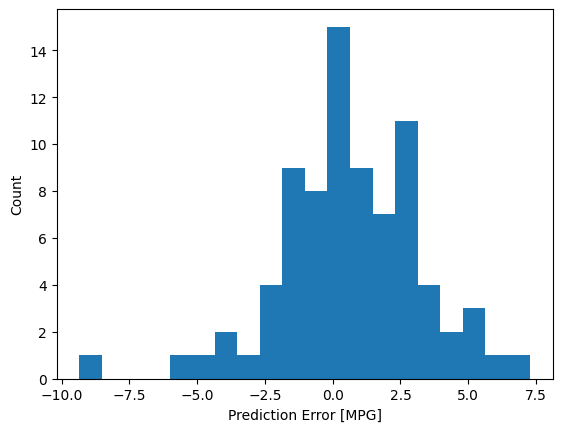

In [27]:
# VEO DISTRIBUCIÓN DE ERRORES DE PREDICCIÓN
# CUANTO MÁS 'GAUSSIANO', MEJOR
error = test_predictions - test_labels
plt.hist(error, bins = 20)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")